# Importing and Tidying the Data

In [1]:
# import stuff
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [3]:
#import the data from csv file with a series of NAN values 
df1 = pd.read_csv('./../data/highered_00004.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 ,
    9999, 999996, 999998, 999999, 9999998, 9999999] )
df1 = df1.drop(['REFID'], axis=1)
df2 = pd.read_csv('./../data/highered_00007.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 ,
    9999, 999996, 999998, 999999, 9999998, 9999999] )
df = df1.merge(df2,  on=['PERSONID', 'YEAR', 'WEIGHT', 'SAMPLE', 'SURID'])

In [4]:
# explanation of the survey https://highered.ipums.org/highered/survey_designs.shtml

# Respondents from each of these three surveys with science or engineering degrees                               ##
# or occupations are compiled into one dataset: the SESTAT (the Scientists and Engineers Statistical Data System)##

df.info(3)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 478747 entries, 0 to 478746
Data columns (total 46 columns):
PERSONID    478747 non-null int64
YEAR        478747 non-null int64
WEIGHT      478737 non-null float64
SAMPLE      478747 non-null int64
SURID       478747 non-null int64
AGE         478747 non-null int64
BIRYR       478747 non-null int64
GENDER      478747 non-null int64
MINRTY      478747 non-null int64
RACETH      478747 non-null int64
BTHUS       478747 non-null int64
CTZUSIN     478747 non-null int64
CTZUS       438777 non-null float64
FNVS        20573 non-null float64
CHTOT       219740 non-null float64
BA03Y5      465491 non-null float64
NBAMED      463945 non-null float64
NBAMEMG     465494 non-null float64
DGRDG       478747 non-null int64
HD03Y5      478747 non-null int64
NDGMED      478747 non-null int64
NDGMEMG     478747 non-null int64
LFSTAT      478747 non-null int64
WRKG        478747 non-null int64
HRSWKGR     407478 non-null float64
WKSWKGR     407478 non-n

In [5]:
df_employed = df[df['LFSTAT']==1]
df_employed_small = df_employed.drop(['CTZUS', 'WEIGHT', 'WRKG', 'NRREA','FNVS', 'CHTOT', 'CPI2009C', 'PERSONID', 'LFSTAT','BA03Y5', 'LOOKWK'], axis=1)
df_employed_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407478 entries, 0 to 478746
Data columns (total 35 columns):
YEAR        407478 non-null int64
SAMPLE      407478 non-null int64
SURID       407478 non-null int64
AGE         407478 non-null int64
BIRYR       407478 non-null int64
GENDER      407478 non-null int64
MINRTY      407478 non-null int64
RACETH      407478 non-null int64
BTHUS       407478 non-null int64
CTZUSIN     407478 non-null int64
NBAMED      394508 non-null float64
NBAMEMG     395942 non-null float64
DGRDG       407478 non-null int64
HD03Y5      407478 non-null int64
NDGMED      407478 non-null int64
NDGMEMG     407478 non-null int64
HRSWKGR     407478 non-null float64
WKSWKGR     407478 non-null float64
OCEDRLP     407478 non-null float64
NOCPR       407478 non-null float64
NOCPRMG     407478 non-null float64
SALARY      407478 non-null float64
JOBSATIS    407478 non-null float64
EMSEC       407478 non-null float64
EMSIZE      407478 non-null float64
GOVSUP      40478

In [6]:
#df_employed_l = df_employed_small[df_employed_small.SALARY != 150000]
df_employed_l = df_employed_small.dropna()


Next we use pandas' correlation funcion and seaborns heatmap to get a general idea of how the features are related to each other.

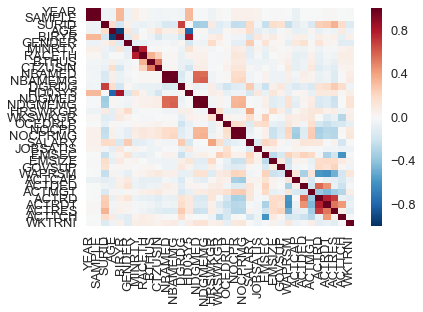

In [7]:
sns.heatmap(df_employed_l.corr())

In [8]:
df_employed_l.corr()['SALARY']

YEAR        0.047753
SAMPLE      0.049694
SURID       0.193761
AGE         0.186057
BIRYR      -0.162161
GENDER      0.257586
MINRTY     -0.102562
RACETH     -0.101382
BTHUS      -0.055799
CTZUSIN     0.012500
NBAMED     -0.037537
NBAMEMG    -0.034085
DGRDG       0.263496
HD03Y5     -0.167808
NDGMED     -0.010046
NDGMEMG    -0.001453
HRSWKGR     0.403946
WKSWKGR     0.176768
OCEDRLP    -0.128177
NOCPR      -0.091245
NOCPRMG    -0.056801
SALARY      1.000000
JOBSATIS   -0.140447
EMSEC       0.215927
EMSIZE      0.169909
GOVSUP      0.022820
WAPRSM     -0.034008
ACTCAP      0.042460
ACTDED      0.126313
ACTMGT      0.119822
ACTRD       0.115217
ACTRDT     -0.012041
ACTRES      0.036424
ACTTCH     -0.183005
WKTRNI      0.007476
Name: SALARY, dtype: float64

Looks like many of the columns are catagorical and has been stored in the same column as numbers, such as the field of major, highest degree and etc. They need to be treated that way. Here pandas get_dummies are used for this purpose. 

In [10]:
df_employed_d = pd.get_dummies(df_employed_l, columns=['RACETH','NBAMED', 'NBAMEMG', 'NDGMED', 'EMSEC','EMSIZE', 'GOVSUP', 'NDGMEMG', 'OCEDRLP', 'WAPRSM','WKTRNI', 'NOCPR', 'NOCPRMG', 'SAMPLE', 'HD03Y5', 'DGRDG', 'JOBSATIS','SURID','HRSWKGR','WKSWKGR'], drop_first=True)

In [25]:
X = df_employed_d.drop(['SALARY'], axis=1)
y = df_employed_d['SALARY']

#import the machine learning algorithm packages
# Import modules of linear regresssion, evaluation, and train test split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Import Lasso
from sklearn.linear_model import Lasso
# Import Ridge
from sklearn.linear_model import Ridge


#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg
reg = Ridge()


# Fit the model to the data
reg.fit(X_train,y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

# Print R^2 
print(reg.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


0.510199918876
Root Mean Squared Error: 27687.163029587227


Only looking at the data where salary is not 0. The R2 improved slightly. 

In [41]:
df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)]
X = df_employed_no.drop(['SALARY'], axis=1)
y = df_employed_no['SALARY']

#import the machine learning algorithm packages
# Import modules of linear regresssion, evaluation, and train test split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Import Lasso
from sklearn.linear_model import Lasso
# Import Ridge
from sklearn.linear_model import Ridge


#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg
reg = Ridge()


# Fit the model to the data
reg.fit(X_train,y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

# Print R^2 
print(reg.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


0.51447672626
Root Mean Squared Error: 27347.91125774655


The linear regression result gives a R2 of 0.51, which is not bad considering some essential fact contributing to the salary is unknown: level of the position, location of the job,  and company pay ability. This next cell shows a histogram of the actual salaries and the predicted salaries. We see the distribution of predected salary is more centrally located around the mean. Can this give us a hint as to what to do next?

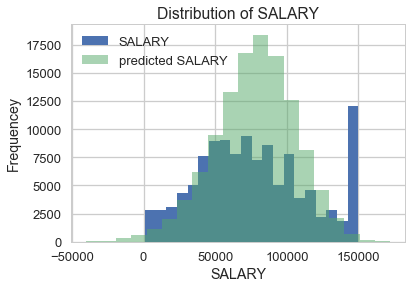

In [42]:
plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_pred,  bins=20, alpha=0.5, label='predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()

How about polynomial regression? => not improving the result.

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

df_sample = df_employed_d.sample(frac=0.01, random_state=42)

X_s = df_sample.drop(['SALARY'], axis=1)
y_s = df_sample['SALARY']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.3, random_state=42)



model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                   ('linear', LinearRegression())])

# fit to an order-2 polynomial data

model.fit(X_train, y_train)

# Compute predictions over the prediction space: y_pred
y_pred = model.predict(X_test)

# Print R^2 
print(model.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


-0.532332645709
Root Mean Squared Error: 48524.19561370276


In [43]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary() )
#m3 = ols(formula='SALARY ~ ALL',data = df_employed_d).fit()
#print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     3181.
Date:                Tue, 17 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:56:38   Log-Likelihood:            -4.5365e+06
No. Observations:              389896   AIC:                         9.073e+06
Df Residuals:                  389765   BIC:                         9.075e+06
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YEAR               34.4396     31.320     

Above gives the result from the linear regresssion by statsmodel. We see the correlation is statistically significant (p-value from the F-statistic). The R^2 score is consistent with what is given by sklearn linear models. 

In [24]:
# Import necessary modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)]
X = df_employed_no.drop(['SALARY'], axis=1)
y = df_employed_no['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

param_grid = {"n_estimators": [10, 30, 50],
              "max_features": [10, 30],
              "max_depth": [10, 100, 300]
              }

# Instantiate a logistic regression classifier: logreg
rfr = RandomForestRegressor()

# Instantiate the GridSearchCV object: logreg_cv
rfr_cv = GridSearchCV(rfr, param_grid, cv=5)

# Fit it to the data
rfr_cv.fit(X_train,y_train)

y_rfr_cv = rfr_cv.predict(X_test)

rmse_rfr_cv = np.sqrt(mean_squared_error(y_test,y_rfr_cv))

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(rfr_cv.best_params_)) 
print("Best score is {}".format(rfr_cv.best_score_))

# test data result
print("Score on the test data is: ", rfr_cv.score(X_test, y_test))

# Print RMSE
print("RBF Root Mean Squared Error: {}".format(rmse_rfr_cv))

Tuned Logistic Regression Parameters: {'max_depth': 300, 'max_features': 30, 'n_estimators': 30}
Best score is 0.4537295202072781
Score on the test data is:  0.452772934684
RBF Root Mean Squared Error: 28997.836862531163


In [ ]:
## Trying random forest regressor 
df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)]
X = df_employed_no.drop(['SALARY'], axis=1)
y = df_employed_no['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, max_features=25, max_depth=100)

#rfr.fit(X,y)
# Use feature selection
#model = SelectFromModel(rfr, prefit=True)
#X_new = model.transform(X)

#train test split
#X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=42)

y_rfr = rfr.fit(X_train, y_train).predict(X_test)

y_rfr = np.clip(y_rfr, 0, 150000)

rmse_rfr = np.sqrt(mean_squared_error(y_test,y_rfr))

# define function to calculate R2 : coefficient of determinatin

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

# Print R2
print(coefficient_of_determination(y_test, y_rfr))

# Print RMSE
print("RBF Root Mean Squared Error: {}".format(rmse_rfr))


plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_rfr,  bins=20, alpha=0.5, label='predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()

In [167]:
## Regression on data with less than 150000 salary


df_decap = df_employed_d[df_employed_d['SALARY']<150000]
X = df_decap.drop(['SALARY'], axis=1)
y = df_decap['SALARY']


# Create the regressor: reg
reg = Ridge(alpha=100)

# Fit the model to the data
reg.fit(X,y)

# Use feature selection
model = SelectFromModel(reg, prefit=True)
X_new = model.transform(X)


0.429307967437
Root Mean Squared Error: 25304.52951105597


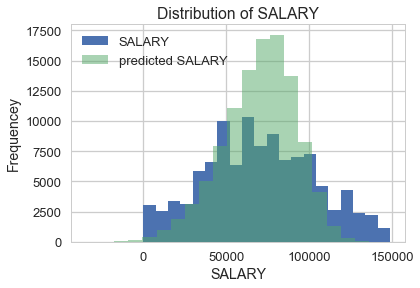

In [169]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=42)

# Compute predictions over the prediction space: y_pred
# Fit the model to the new data
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Print R^2 
print(reg.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# your turn

plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_pred,  bins=20, alpha=0.5, label='predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()


In [172]:
df_demax = df_employed_d[df_employed_d['SALARY']<150000]
X_s = df_demax.drop(['SALARY'], axis=1)
y_s = df_demax['SALARY']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.3, random_state=42)

# Setup the hyperparameter grid
#param_grid = {"n_estimators": [100],
#              "max_features": [25],
#              "max_depth": [100]
#              }

# Instantiate a logistic regression classifier: logreg
rfr = RandomForestRegressor(n_estimators=100, max_features=25, max_depth=100)

# Instantiate the GridSearchCV object: logreg_cv
#rfr_cv = GridSearchCV(rfr, param_grid, cv=5)

# Fit it to the data
rfr.fit(X_train,y_train)

y_rfr = rfr.predict(X_test)

rmse_rfr = np.sqrt(mean_squared_error(y_test,y_rfr))

# Print the tuned parameters and score
#print("Tuned Logistic Regression Parameters: {}".format(rfr.best_params_)) 
#print("Best score is {}".format(rfr.best_score_))

# test data result
print("Score on the test data is: ", rfr.score(X_test, y_test))

# Print RMSE
print("Root Mean Squared Error: {}".format(rmse_rfr))


Score on the test data is:  0.53976874422
RBF Root Mean Squared Error: 22724.033297805556


In [22]:
# Import necessary modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


df_demax = df_employed_d[df_employed_d['SALARY']<=150000]
df_demax_sample = df_demax.sample(frac=0.1)

X_s = df_demax_sample.drop(['SALARY'], axis=1)
y_s = df_demax_sample['SALARY']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.3, random_state=42)

# Setup the hyperparameter grid
#param_grid = {"n_estimators": [100],
#              "max_features": [25],
#              "max_depth": [100]
#              }

# Instantiate a logistic regression classifier: logreg
rfr = RandomForestRegressor(n_estimators=200, max_features=25, max_depth=100)

# Instantiate the GridSearchCV object: logreg_cv
#rfr_cv = GridSearchCV(rfr, param_grid, cv=5)

# Fit it to the data
rfr.fit(X_train,y_train)

y_rfr = rfr.predict(X_test)

rmse_rfr = np.sqrt(mean_squared_error(y_test,y_rfr))

# Print the tuned parameters and score
#print("Tuned Logistic Regression Parameters: {}".format(rfr.best_params_)) 
#print("Best score is {}".format(rfr.best_score_))

# test data result
print("Score on the test data is: ", rfr.score(X_test, y_test))

# Print RMSE
print("RBF Root Mean Squared Error: {}".format(rmse_rfr))

Score on the test data is:  0.511652980776
RBF Root Mean Squared Error: 27812.743484063572


In [81]:
# Trying SVR 
from sklearn.svm import SVR
df_demax = df_employed_d[df_employed_d['SALARY']<=150000]
df_demax_sample = df_demax.sample(frac=0.20, random_state=42)

X_s = df_demax_sample.drop(['SALARY'], axis=1)
y_s = df_demax_sample['SALARY']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.3, random_state=42)


svr_rbf = SVR(kernel='rbf', C=120000, gamma=0.005)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
#y_lin = svr_fit(X_train, y_train).predict(X_test)
#y_poly = svr_fit(X_train, y_train).predict(X_test)

rmse_rbf = np.sqrt(mean_squared_error(y_test,y_rbf))
#rmse_lin = np.sqrt(mean_squared_error(y_test,y_lin))
#rmse_poly = np.sqrt(mean_squared_error(y_test,y_poly))

# Print R^2 
print(svr_rbf.score(X_test, y_test))

# Print RMSE
print("RBF Root Mean Squared Error: {}".format(rmse_rbf))
#print("LIN Root Mean Squared Error: {}".format(rmse_lin))
#print("Poly Root Mean Squared Error: {}".format(rmse_poly))

0.542291790043
RBF Root Mean Squared Error: 26642.618911954625
